# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [81]:
# Import the titanic dataset here
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


In [82]:
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,passenger
...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1,crew
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1,crew
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0,crew
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0,NaN


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [83]:
# Filter the data to include only passengers
df_passenger = df_titanic[df_titanic["class"].isin(["1st", "2nd", "3rd"])]

# Create a crosstab
cross_tab = pd.crosstab(df_titanic["class"], df_passenger["embarked"])

# Print the crosstab
cross_tab


embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [84]:
# Code here

cross_tab = {"B": [3, 6, 0], "C": [143, 26, 102], "Q": [3, 7, 113], "S": [175, 245, 494]}
df_titanic= pd.DataFrame(cross_tab, index = ["1st", "2nd", "3rd"])

# Calculate the conditional distribution of class given where they embarked
conditional_embarked = df_titanic.divide(df_titanic.sum(axis=0), axis=1)

# Print the conditional distributions
print("Conditional Distribution of Class Given Where They Embarked:")
print(conditional_embarked)


Conditional Distribution of Class Given Where They Embarked:
            B         C         Q         S
1st  0.333333  0.527675  0.024390  0.191466
2nd  0.666667  0.095941  0.056911  0.268053
3rd  0.000000  0.376384  0.918699  0.540481


In [85]:
cross_tab = {"B": [3, 6, 0], "C": [143, 26, 102], "Q": [3, 7, 113], "S": [175, 245, 494]}
df_titanic= pd.DataFrame(cross_tab, index = ["1st", "2nd", "3rd"])

# Calculate the conditional distribution of where they embarked given their class
embarked_conditional = df_titanic.divide(df_titanic.sum(axis=1), axis=0)

print("Conditional Distribution of Where They Embarked Given Their Class:")
print(embarked_conditional)

Conditional Distribution of Where They Embarked Given Their Class:
            B         C         Q         S
1st  0.009259  0.441358  0.009259  0.540123
2nd  0.021127  0.091549  0.024648  0.862676
3rd  0.000000  0.143865  0.159379  0.696756


In [86]:
# Answer the specific questions
prop_3rd_class_S = conditional_embarked.loc['3rd', 'S']
prop_S_in_3rd_class = embarked_conditional.loc['3rd', 'S']

print(f"\nProportion of 3rd class passengers embarked at Southampton: {prop_3rd_class_S:.2f}")
print(f"Proportion of Southampton passengers were in 3rd class: {prop_S_in_3rd_class:.2f}")


Proportion of 3rd class passengers embarked at Southampton: 0.54
Proportion of Southampton passengers were in 3rd class: 0.70


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

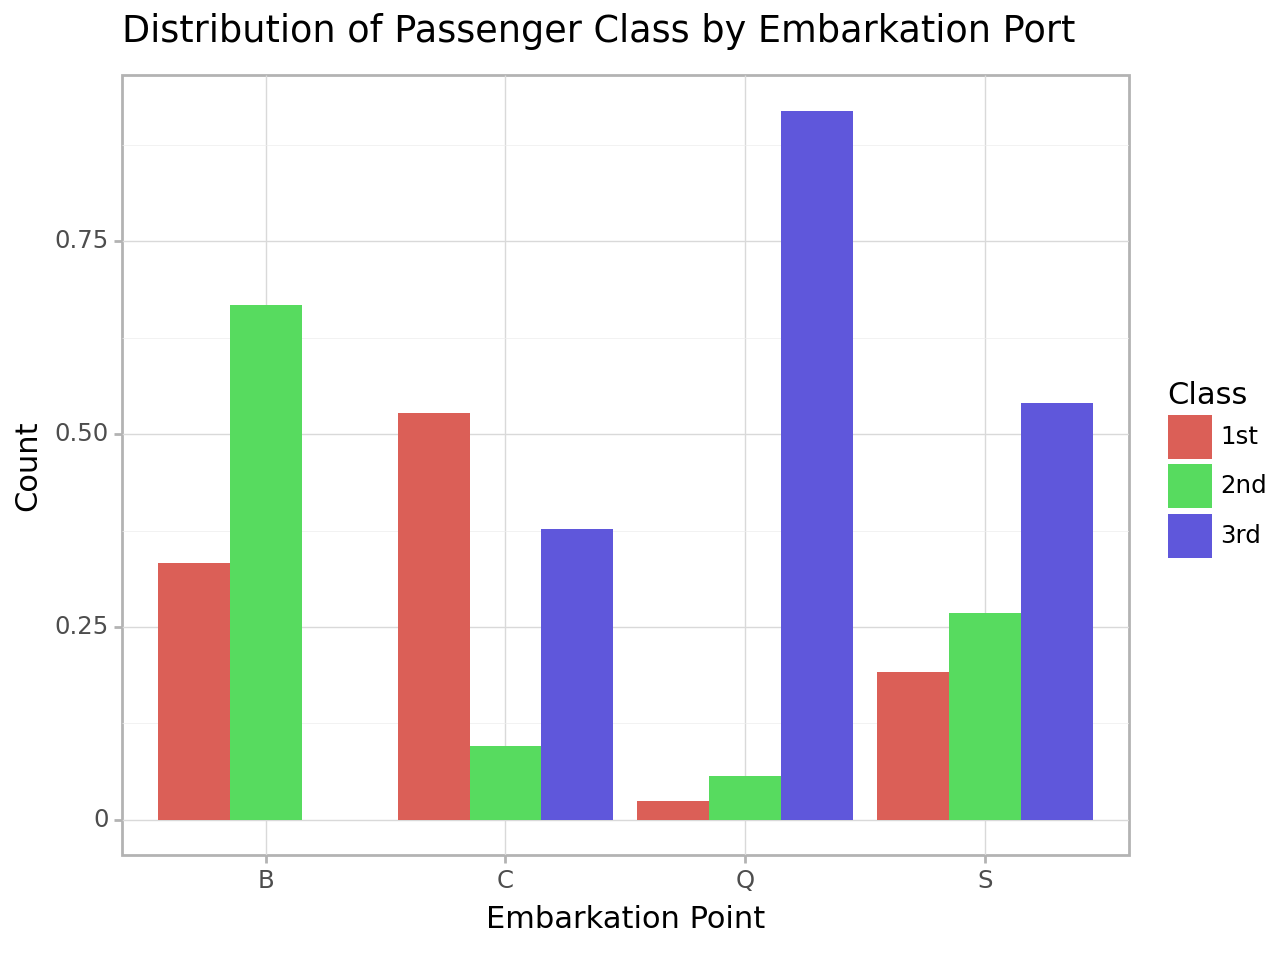

<Figure Size: (640 x 480)>

In [87]:
from plotnine.themes.theme_light import theme_light
# Code here
from plotnine import ggplot, aes, geom_bar, labs, theme

cross_tab = {"Embarked": ["B", "B", "B", "C", "C", "C", "Q", "Q", "Q", "S", "S", "S"],
               "Class": ["1st", "2nd", "3rd", "1st", "2nd", "3rd", "1st", "2nd", "3rd", "1st", "2nd", "3rd"],
               "Count": [3, 6, 0, 143, 26, 102, 3, 7, 113, 175, 245, 494]}

df_titanic= pd.DataFrame(cross_tab)

# Convert count to proportion for each embarkation point
total_per_embark = df_titanic.groupby("Embarked")["Count"].sum().reset_index()
df_titanic = df.merge(total_per_embark, on = "Embarked")

plot = (ggplot(df_titanic, aes(x = "Embarked", y = "Proportion", fill= "Class"))
        + geom_bar(stat = "identity", position = "dodge")
        + theme_light()
        + labs(title = "Distribution of Passenger Class by Embarkation Port",
                x = "Embarkation Point",
                y = "Count"))
plot